In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_avg_values(df, parameters, parameter_name):
    test_loss = []
    test_acc = []
    
    for param in parameters:
        acc_series = np.vstack(df.loc[df[parameter_name] == param]['test_accs'].apply(literal_eval))
        loss_series = np.vstack(df.loc[df[parameter_name] == param]['test_losses'].apply(literal_eval))

        acc_mean = np.mean(acc_series, axis=0)
        loss_mean = np.mean(loss_series, axis=0)

        test_acc.append(acc_mean)
        test_loss.append(loss_mean)
       
    return test_acc, test_loss


def make_plot(data, variable, xlabel='', ylabel='', title='', path=''):
    y = np.arange(len(data)) + 1
    
    fig, ax = plt.subplots()
    for X, var in zip(data, variable):
        ax.plot(y, X, '--', label=var)
    ax.set(xlabel=xlabel, ylabel=ylabel , title=title)
    plt.legend()
    
    if path:
        fig.savefig(path)
    
    plt.show()
    
    
def make_double_plot(data_1, data_2, legend_1, legend_2, xlabel='', ylabel_1='', ylabel_2='', title='', path=''):
    y = np.arange(len(data_1[0])) + 1

    fig, ax = plt.subplots()
    for X in data_1:
        ax.plot(y, X, '--', )
    ax.set(xlabel=xlabel, ylabel=ylabel_1, title=title)

    ax2 = ax.twinx()

    for X in data_2:
        ax2.plot(y, X, ':', )
    ax2.set(ylabel=ylabel_2)

    lines1 = ax.get_lines()
    lines2 = ax2.get_lines()
    legend1 = plt.legend([line for line in lines1], legend_1, loc=2, framealpha=0.5)
    legend2 = plt.legend([line for line in lines2], legend_2, loc=(0.72, 0.1))
    fig.add_artist(legend1)
    fig.add_artist(legend2)
    
    if path:
        plt.savefig(path)

    plt.show()
        


In [3]:
df = pd.read_csv('./1DO-1DS/1DO-1DS_learning_rate.csv')
df_fl = df.loc[df['dp_used'] == False]

df_no_fl = pd.read_csv('./1DS/1DS_no_DP.csv')

lrs = [0.0001, 0.0005, 0.001, 0.002, 0.005]

fl_acc, fl_loss = get_avg_values(df_fl, lrs, 'learning_rate')
no_fl_acc, no_fl_loss = get_avg_values(df_no_fl, lrs, 'learning_rate')

# make_plot(no_fl_data, lrs, xlabel="Epochs", ylabel="Test Accuracy",
#         title="Ground Truth", path="./1DS/no_FL_test_acc_lr.jpg")
# make_plot(fl_data, lrs, xlabel="Epochs", ylabel="Test Accuracy",
#         title="Federated Learning", path="./1DS/FL_test_acc_lr.jpg")

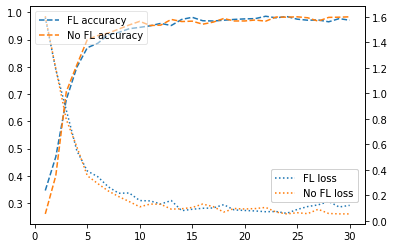

In [7]:
data_acc = [fl_acc[3], no_fl_acc[3]]
data_loss = [fl_loss[3], no_fl_loss[3]]

# make_double_plot(data_acc, data_loss, ['FL accuracy', 'No FL accuracy'], ['FL loss', 'No FL loss'])